# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Đoàn Thị Yến Nhi   
- MSSV: 21127660
- Lớp: 21CLC05

# Import

In [49]:
# Import thêm dữ thư viện nếu cần
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error


# Đọc dữ liệu

In [50]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [51]:
# Cài đặt các hàm cần thiết ở đây



# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [52]:
#Phần code cho yêu cầu 1a
features=['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree' , 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain']
target='Salary'
    
X_train_a=train[features]
y_train_a=train[target]
    
X_test_a=test[features]
y_test_a=test[target]
    
    # Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

    # Huấn luyện mô hình
model.fit(X_train_a, y_train_a)
    
y_pred = model.predict(X_test_a)
    
    
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)  

Coefficients: [-23183.32950765    702.76679172   1259.0187879  -99570.60814074
  18369.9624496    1297.53200035  -8836.727123      141.75993906
    145.74234652    114.64331342  34955.75040521]
Intercept: 49248.08973480275


In [53]:
#Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
mae = mean_absolute_error(y_test, y_pred)
print("MAE score:", mae)   

MAE score: 105052.52978823165


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [54]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất   
personality_features=['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
target='Salary'
       
personality_model=LinearRegression()
kf=KFold(n_splits=5, shuffle=True, random_state=42)
best_personality_feature = None
best_personality_mean_mae = float('inf')
    
for feature in personality_features:
    X=train[[feature]]
    y=train[target]
    mae_scores=[]
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        personality_model.fit(X_train, y_train)
        
        y_pred=personality_model.predict(X_test)
        
        mae=mean_absolute_error(y_test, y_pred)
        mae_scores.append(mae)
    #In ra các kết quả cross-validation như yêu cầu        
    mean_mae = sum(mae_scores) / len(mae_scores)
    print(f"Feature: {feature}, Mean MAE score: {mean_mae}")
        # print("Score of cross validation for column " + str(feature))
        # print(mae_scores)
        
    if mean_mae < best_personality_mean_mae: 
        best_personality_feature = feature
        best_personality_mean_mae = mean_mae

print(f"Best Feature: {best_personality_feature}")   
    
# cau_b('train.csv') 
# In ra các kết quả cross-validation như yêu cầu

Feature: conscientiousness, Mean MAE score: 124182.56382341131
Feature: agreeableness, Mean MAE score: 123706.05473004379
Feature: extraversion, Mean MAE score: 123809.92619981666
Feature: nueroticism, Mean MAE score: 123473.39978671989
Feature: openess_to_experience, Mean MAE score: 123818.33357543619
Best Feature: nueroticism


In [55]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_personality_feature = 'nueroticism'
target = 'Salary'
    
X_personality_train = train[[best_personality_feature]]
y_personality_train = train[target]
    
X_personality_test = test[[best_personality_feature]]
y_personality_test = test[target]
    
best_personality_feature_model=LinearRegression()
best_personality_feature_model.fit(X_personality_train, y_personality_train)
    
y_personality_pred=best_personality_feature_model.predict(X_personality_test)
    
coefficients = best_personality_feature_model.coef_
intercept = best_personality_feature_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [-16021.49366179]
Intercept: 304647.55255226186


In [56]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
per_mae=mean_absolute_error(y_personality_test,y_personality_pred)
print("MAE:", per_mae)

MAE: 119361.91739987815


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [57]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất  
skill_features=['English', 'Logical', 'Quant']
target='Salary'
       
model=LinearRegression()
kf=KFold(n_splits=5, shuffle=True, random_state=42)
best_skill_feature = None
best_skill_mean_mae = float('inf')
    
for feature in skill_features:
    X=train[[feature]]
    y=train[target]
    mae_scores=[]
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred=model.predict(X_test)
        
        mae=mean_absolute_error(y_test, y_pred)
        mae_scores.append(mae)
            
    mean_mae = sum(mae_scores) / len(mae_scores)
    print(f"Feature: {feature}, Mean MAE score: {mean_mae}")
        
    if mean_mae < best_skill_mean_mae: 
        best_skill_feature = feature
        best_skill_mean_mae = mean_mae
        
print(f"Best Feature: {best_skill_feature}")   

# In ra các kết quả cross-validation như yêu cầu

Feature: English, Mean MAE score: 120728.60366575858
Feature: Logical, Mean MAE score: 119932.50359881199
Feature: Quant, Mean MAE score: 117353.83803114605
Best Feature: Quant


In [58]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_skill_feature = 'Quant'
target = 'Salary'
    
X_skill_train = train[[best_skill_feature]]
y_skill_train = train[target]
    
X_skill_test = test[[best_skill_feature]]
y_skill_test= test[target]
    
best_skill_feature_model=LinearRegression()
best_skill_feature_model.fit(X_skill_train, y_skill_train)
    
y_skill_pred=best_skill_feature_model.predict(X_skill_test)
    
coefficients = best_skill_feature_model.coef_
intercept = best_skill_feature_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# best_feature('train.csv', 'test.csv')

Coefficients: [368.85246384]
Intercept: 117759.72931230717


In [59]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
mae_score=mean_absolute_error(y_skill_test,y_skill_pred)
print("MAE:", mae_score)

MAE: 108814.05968837196


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [60]:
# Trình bày các phần tìm ra mô hình
# 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


Biểu đồ tương quan (Correlation plot) để hiểu tương quan giữa các biến

In [61]:
correlations = train_data.corr()['Salary'].sort_values(ascending=False)
print(correlations)

Salary                   1.000000
Quant                    0.205358
Logical                  0.188416
English                  0.169293
10percentage             0.155174
12percentage             0.149531
ComputerProgramming      0.125866
collegeGPA               0.122469
Domain                   0.122022
agreeableness            0.068623
MechanicalEngg           0.028854
CivilEngg                0.016150
CollegeCityTier          0.004575
extraversion            -0.002661
openess_to_experience   -0.007814
ElectronicsAndSemicon   -0.009292
Degree                  -0.017602
Gender                  -0.036183
TelecomEngg             -0.040415
ElectricalEngg          -0.041217
conscientiousness       -0.057699
nueroticism             -0.073401
ComputerScience         -0.095507
CollegeTier             -0.174824
Name: Salary, dtype: float64


<Axes: >

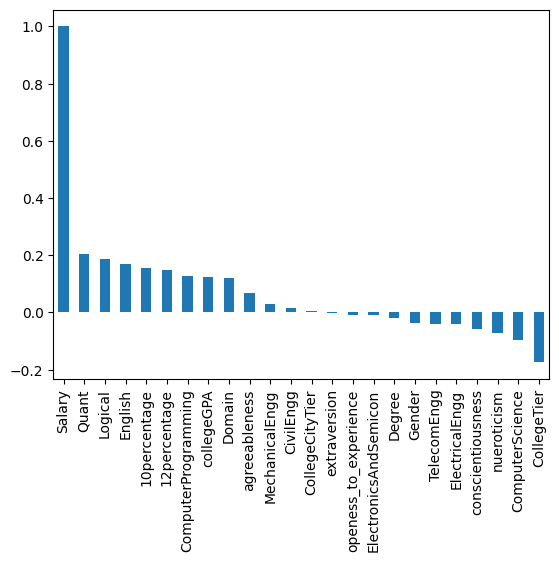

In [62]:
correlations.plot(kind='bar')

Vẽ biểu đồ phân phối (Histogram): Cho biết phân phối của từng biến. Giúp xác định xem biến có dạng phân phối chuẩn hay không.

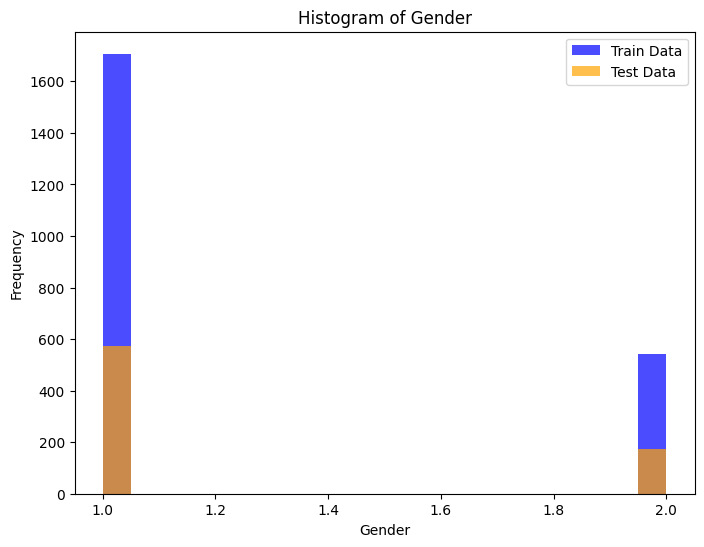

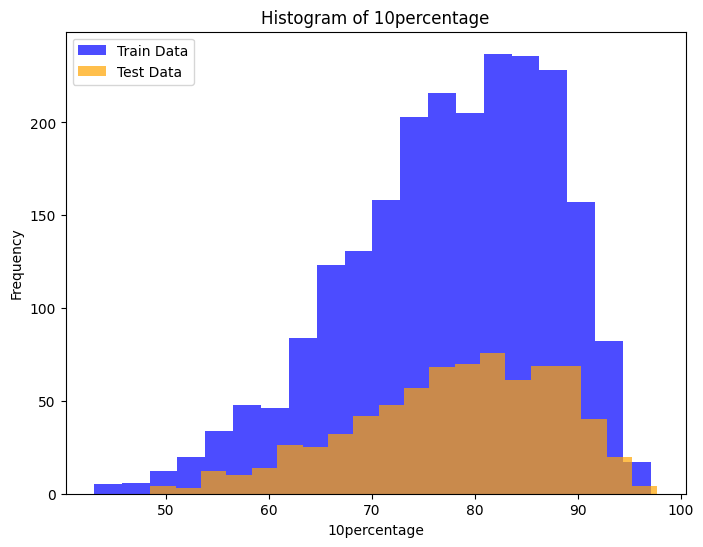

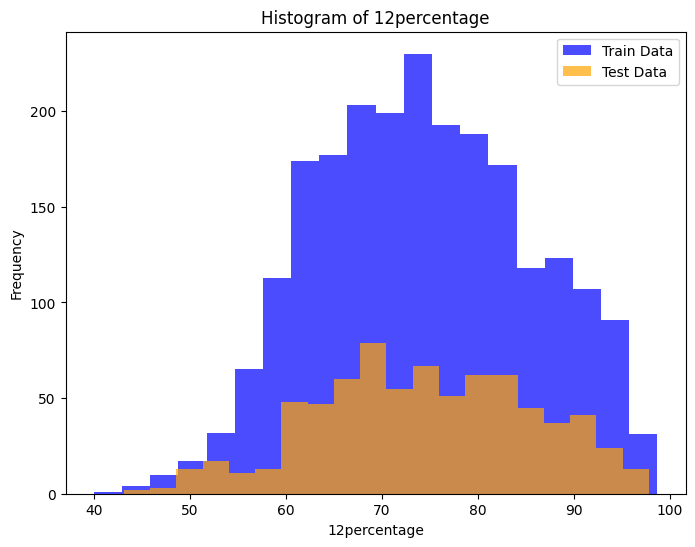

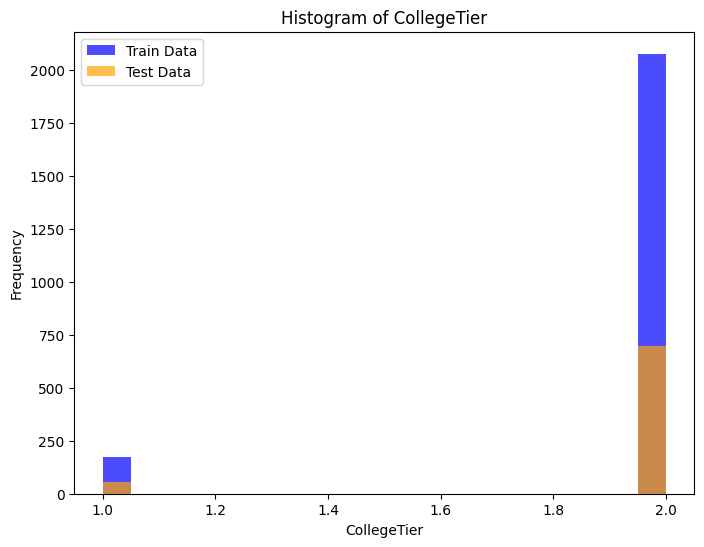

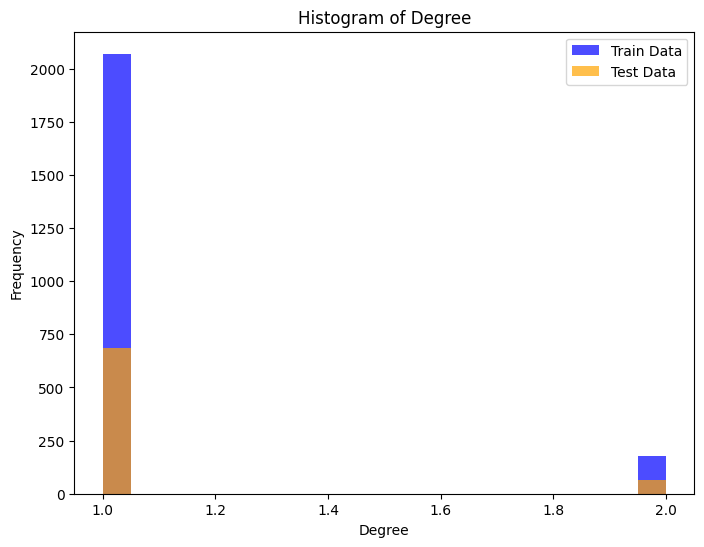

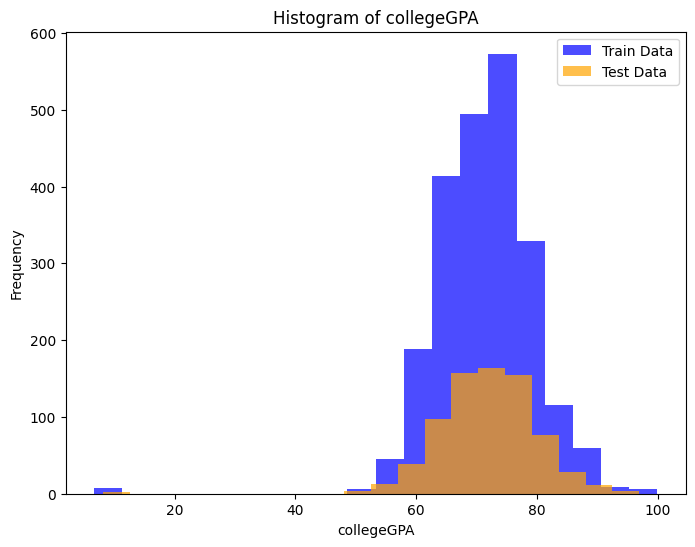

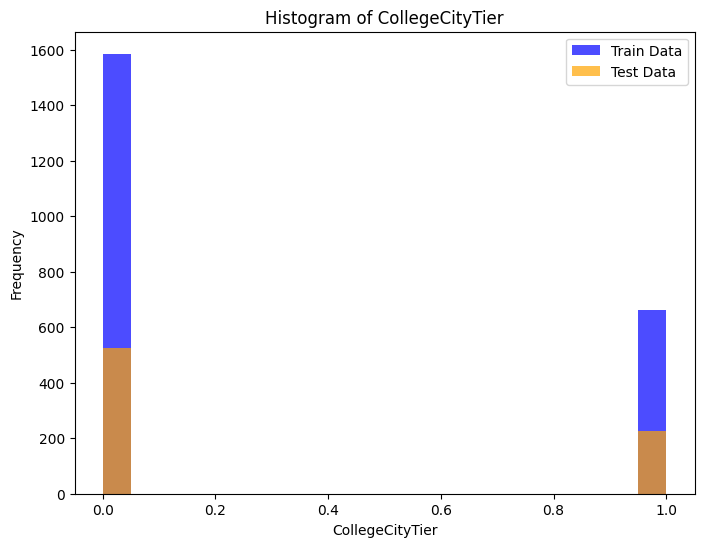

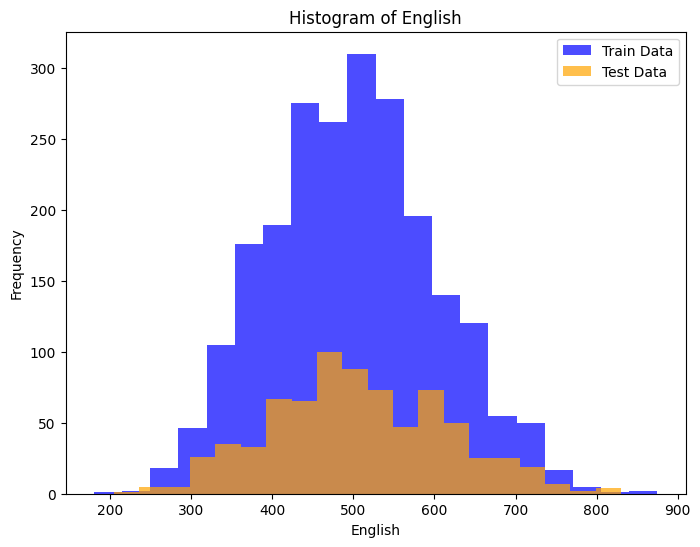

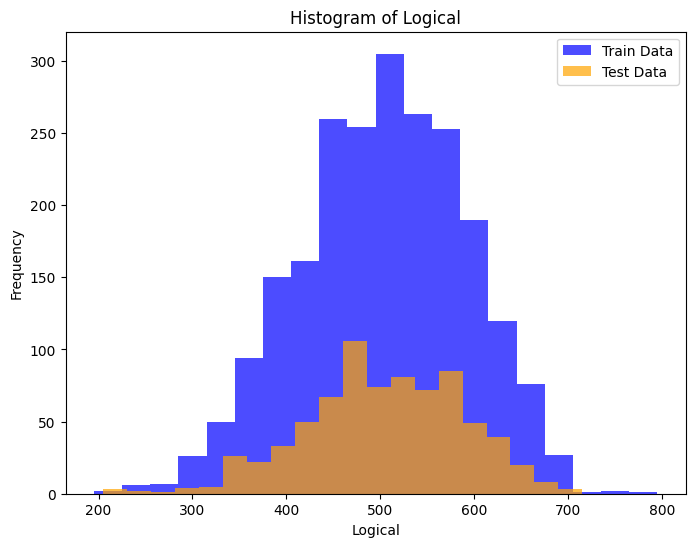

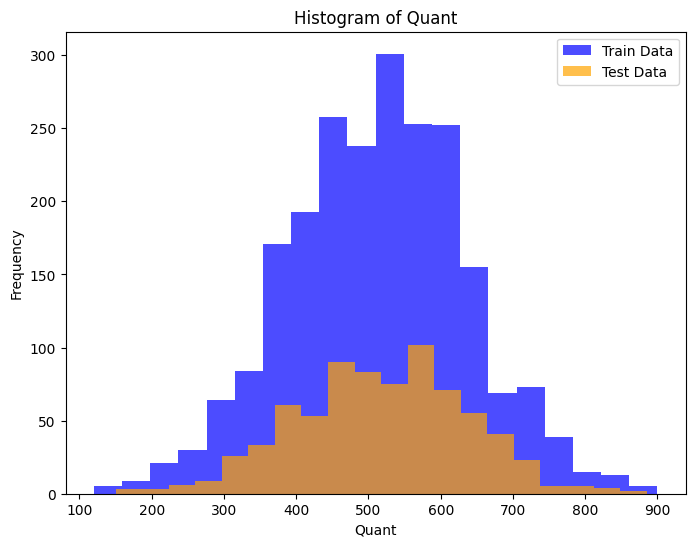

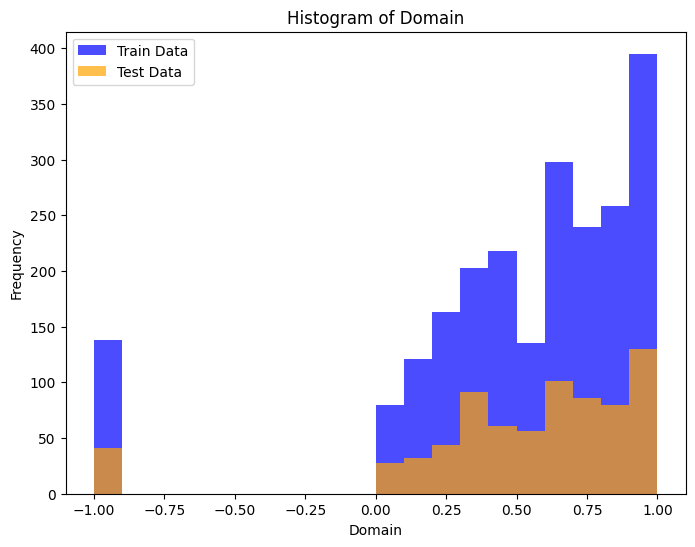

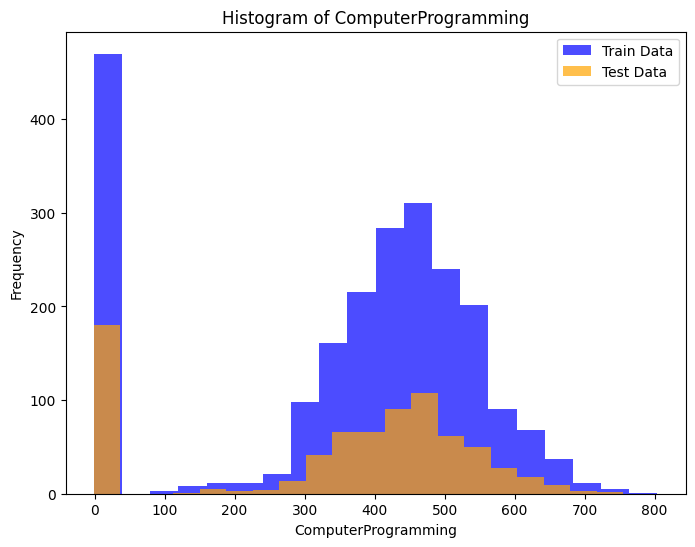

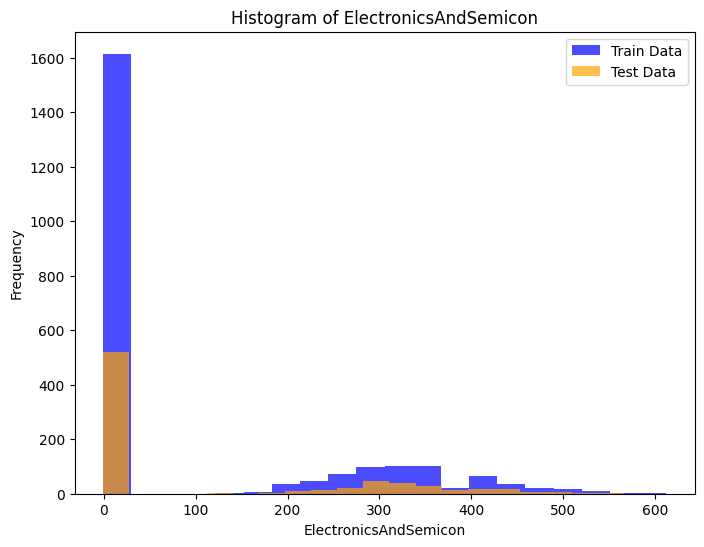

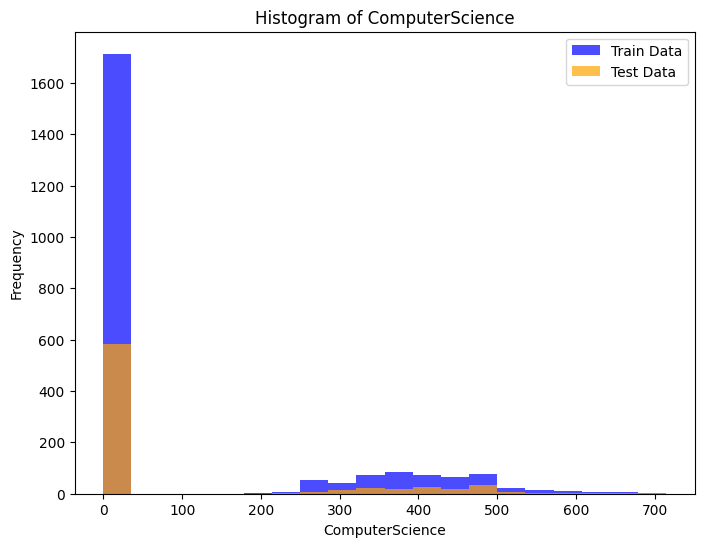

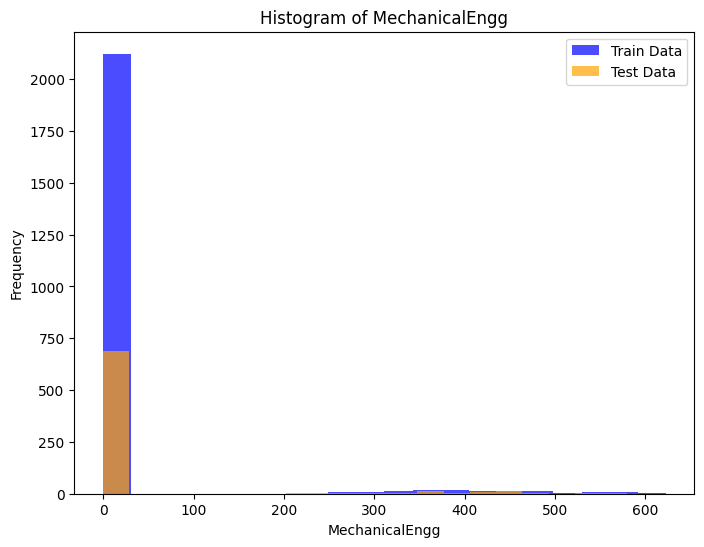

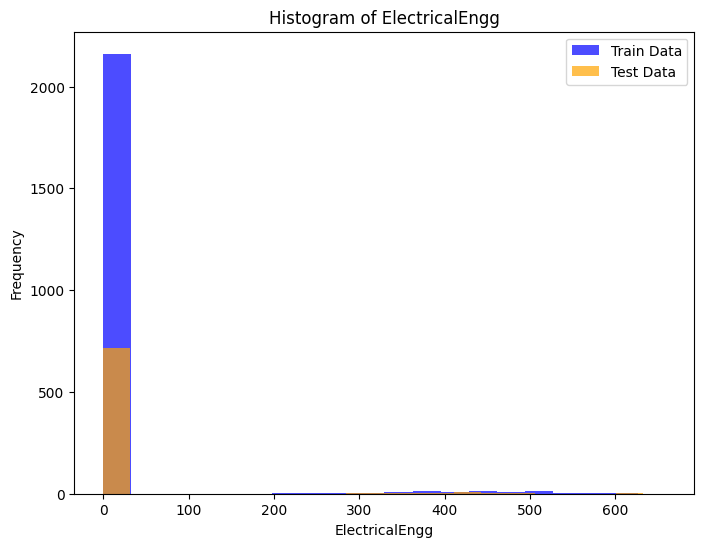

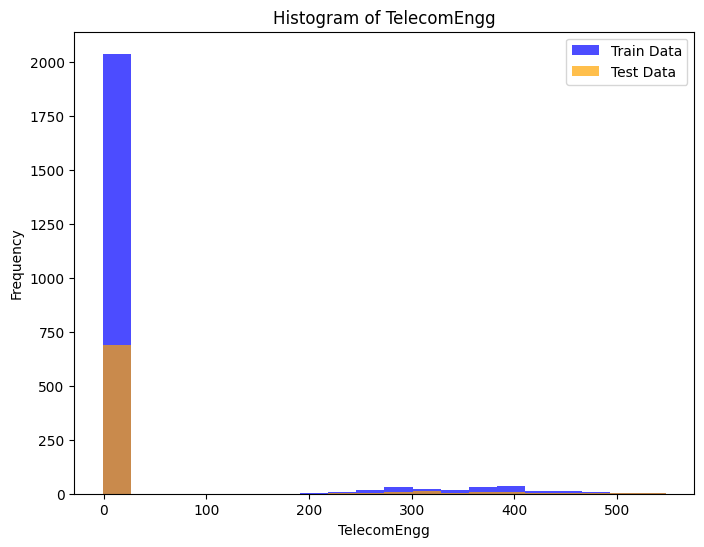

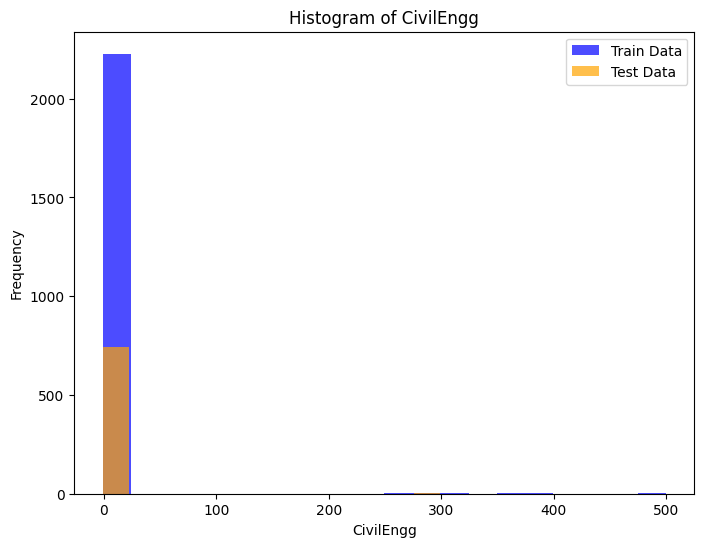

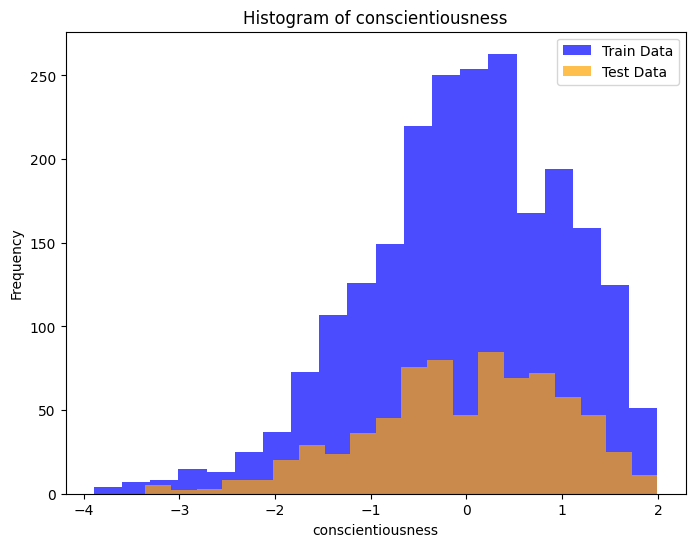

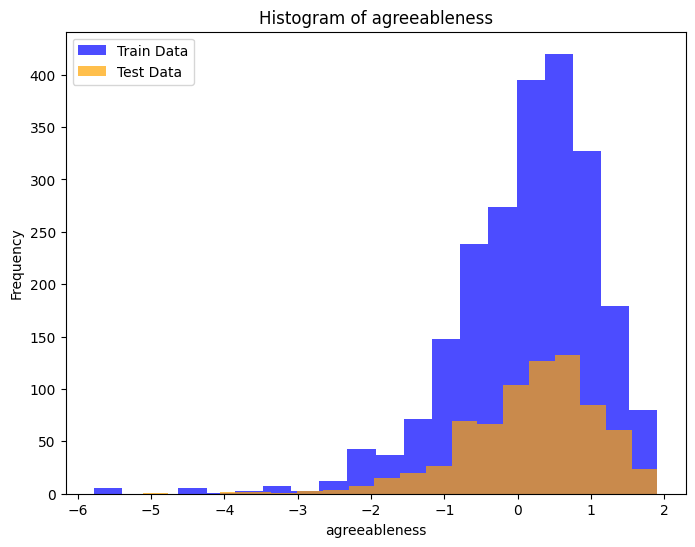

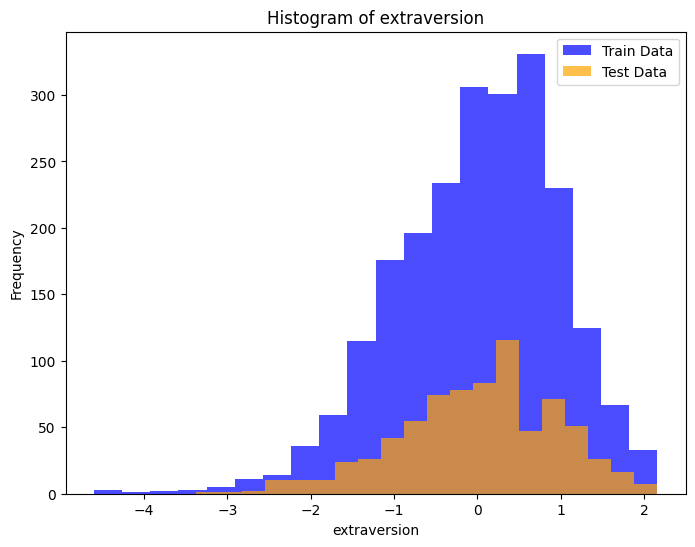

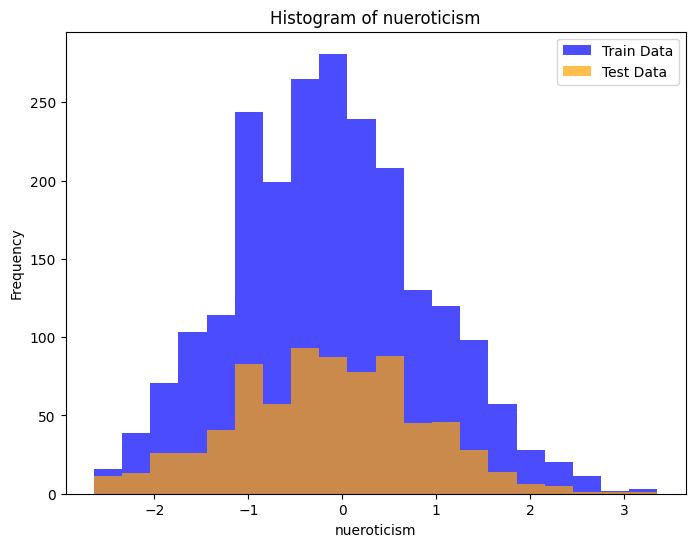

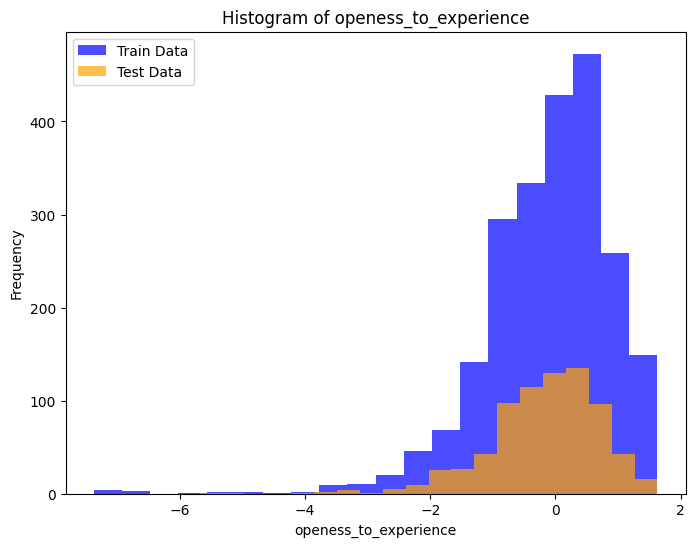

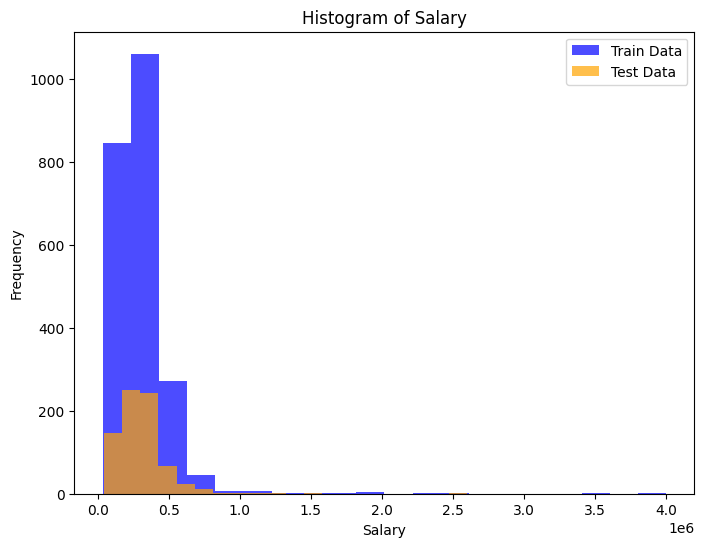

In [63]:
features = ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier', 'English',
            'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
            'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
            'openess_to_experience', 'Salary']

# Loop through each feature to create histogram plots
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(train_data[feature], bins=20, color='blue', alpha=0.7, label='Train Data')
    plt.hist(test_data[feature], bins=20, color='orange', alpha=0.7, label='Test Data')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.legend()
    plt.show()

Biểu đồ phân tán (Scatter Plot): Xem mối quan hệ giữa biến mục tiêu và biến dự đoán. 

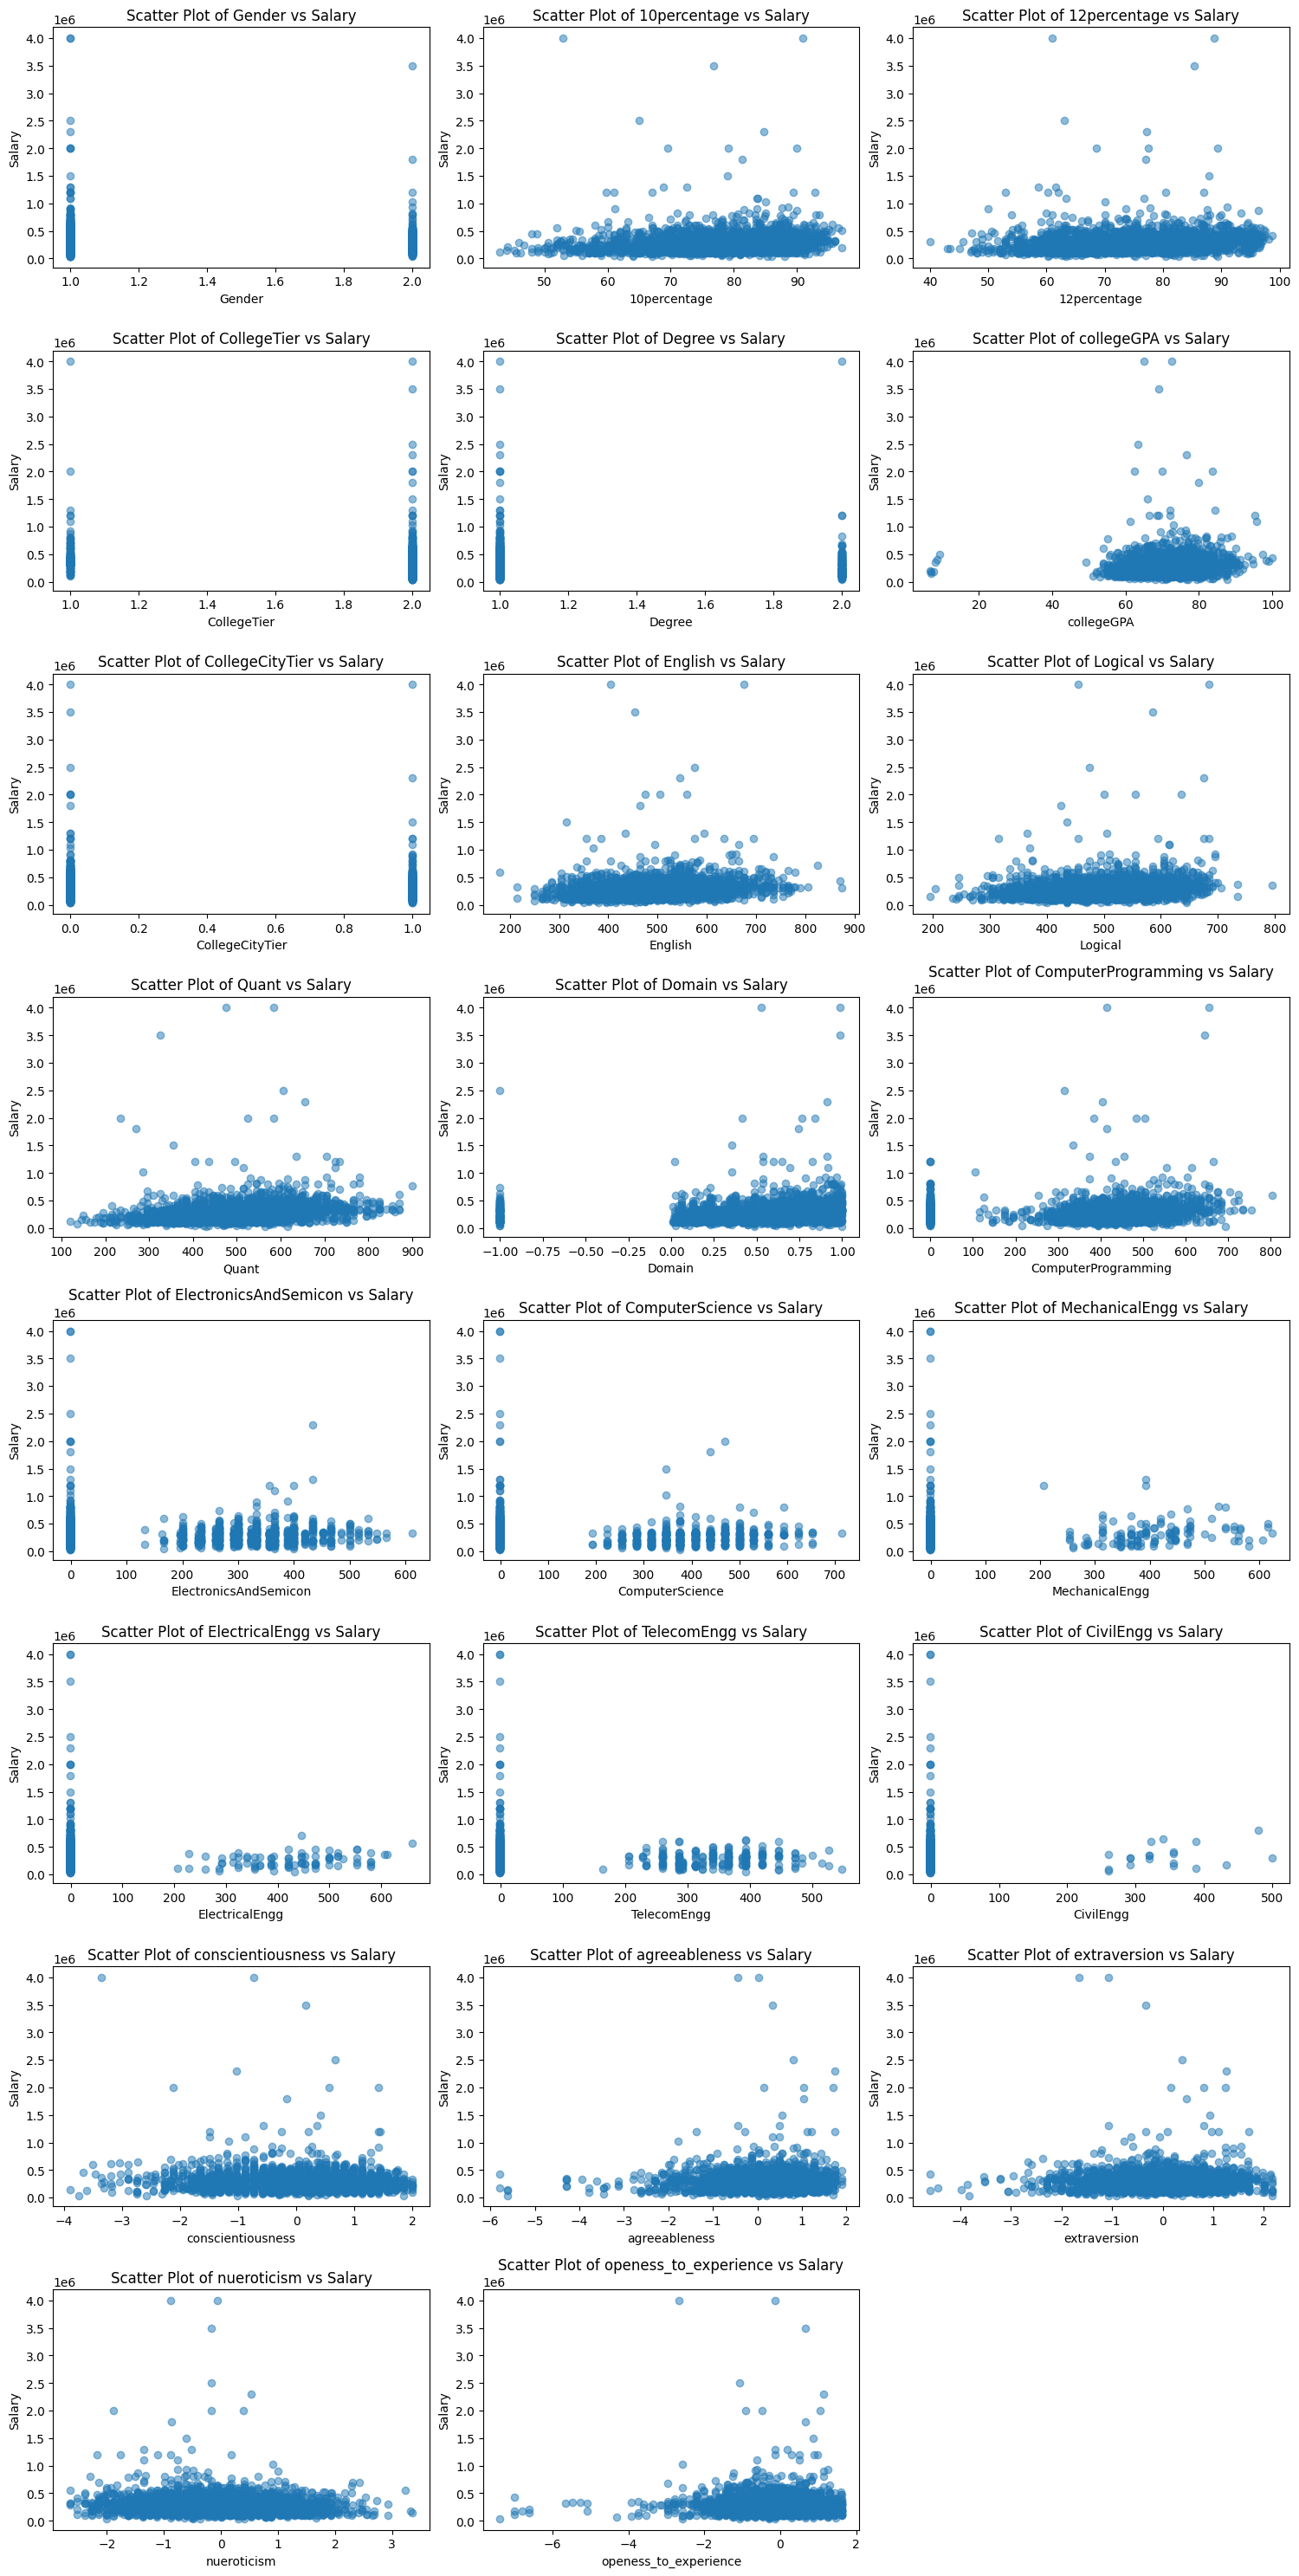

In [64]:
features = ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier',
            'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
            'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness',
            'extraversion', 'nueroticism', 'openess_to_experience']
target = 'Salary'

# Tạo DataFrame từ dữ liệu huấn luyện
data_to_plot = train_data[features + [target]]

# Vẽ biểu đồ phân tán cho từng đặc trưng
plt.figure(figsize=(15, 30))
for i, feature in enumerate(features):
    plt.subplot(8, 3, i + 1)
    plt.scatter(data_to_plot[feature], data_to_plot[target], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Salary')
    plt.xlabel(feature)
    plt.ylabel('Salary')

plt.tight_layout()
plt.show()

In [65]:
# selected_features = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Quant', 'conscientiousness', 'agreeableness', 'nueroticism', 'Salary']

# # Tạo biểu đồ Pair Plot cho các biến được chọn
# sns.pairplot(data[selected_features], diag_kind='kde')
# plt.suptitle("Pair Plot of Selected Features", y=1.02)
# plt.show()

Ma trận tương quan

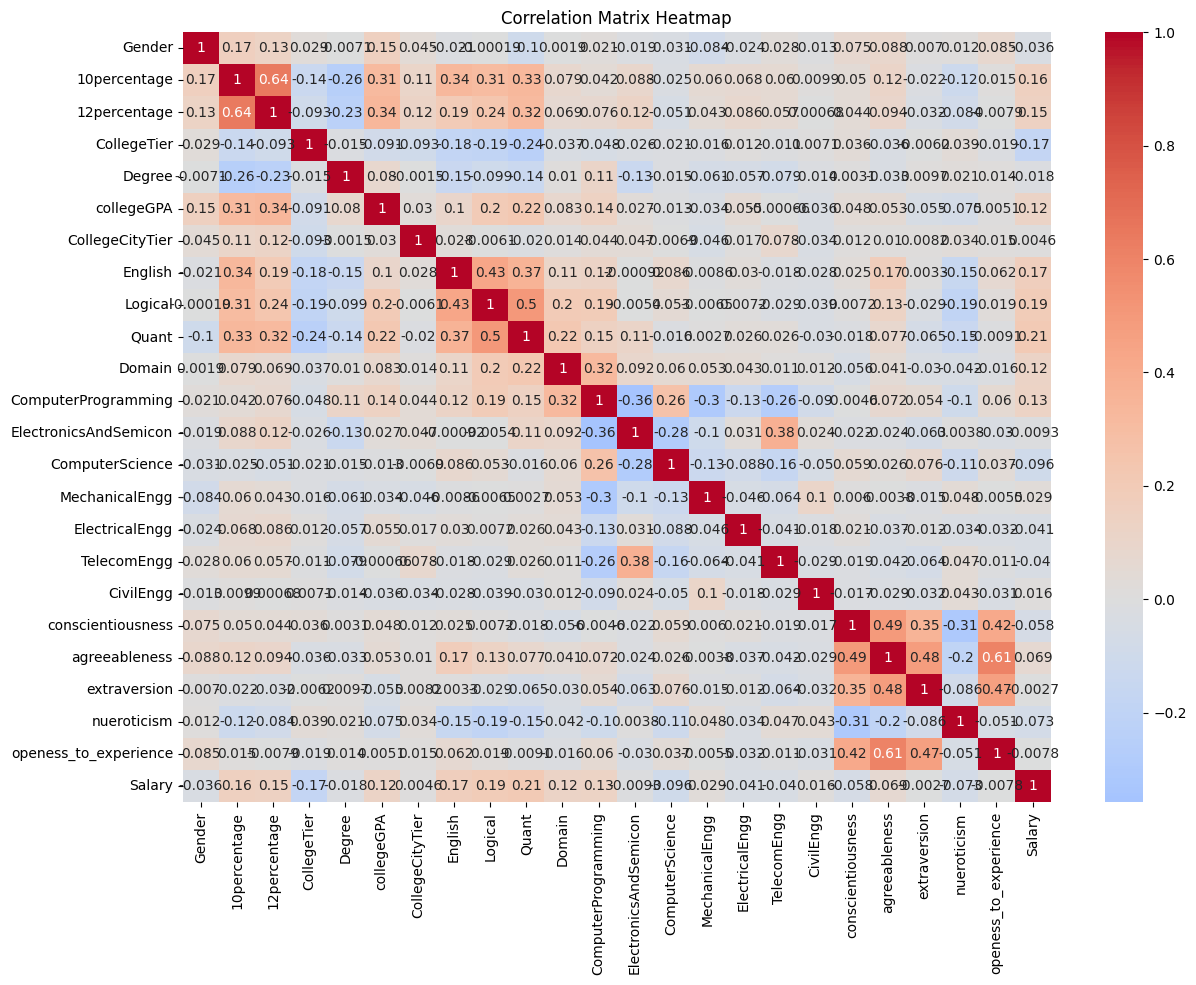

In [66]:
selected_features = ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier',
                     'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                     'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness',
                     'extraversion', 'nueroticism', 'openess_to_experience', 'Salary']

# Tạo DataFrame mới chỉ chứa các biến quan trọng
selected_data = train_data[selected_features]

# Tính toán ma trận tương quan
correlation_matrix = selected_data.corr()

# Trực quan hóa ma trận tương quan bằng biểu đồ heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Thử nghiệm, so sánh các mô hình

In [67]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

In [68]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

In [69]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$